In [1]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

base_path = "C:/Users/HHeha/OneDrive/Desktop/AI2/";

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(base_path + 'train', target_size=(48, 48), batch_size=64, color_mode="grayscale", class_mode='categorical')
test_generator = test_datagen.flow_from_directory(base_path + 'test', target_size=(48, 48), batch_size=64, color_mode="grayscale", class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [4]:
history = model.fit(train_generator, steps_per_epoch= 28709 // 64, epochs=30)

Epoch 1/30
448/448 [==============================] - 79s 175ms/step - loss: 1.7332 - accuracy: 0.2943
Epoch 2/30
448/448 [==============================] - 81s 180ms/step - loss: 1.4655 - accuracy: 0.4340
Epoch 3/30
448/448 [==============================] - 80s 179ms/step - loss: 1.3198 - accuracy: 0.4983
Epoch 4/30
448/448 [==============================] - 80s 179ms/step - loss: 1.2464 - accuracy: 0.5277
Epoch 5/30
448/448 [==============================] - 80s 180ms/step - loss: 1.1905 - accuracy: 0.5491
Epoch 6/30
448/448 [==============================] - 81s 180ms/step - loss: 1.1414 - accuracy: 0.5700
Epoch 7/30
448/448 [==============================] - 84s 188ms/step - loss: 1.1069 - accuracy: 0.5808
Epoch 8/30
448/448 [==============================] - 81s 181ms/step - loss: 1.0725 - accuracy: 0.5954
Epoch 9/30
448/448 [==============================] - 81s 180ms/step - loss: 1.0375 - accuracy: 0.6100
Epoch 10/30
448/448 [==============================] - 81s 181ms/step - l

In [5]:
model.evaluate(test_generator, steps= 7178 // 64)

112/112 [==============================] - 5s 43ms/step - loss: 1.1492 - accuracy: 0.6162


[1.1492149829864502, 0.6162109375]

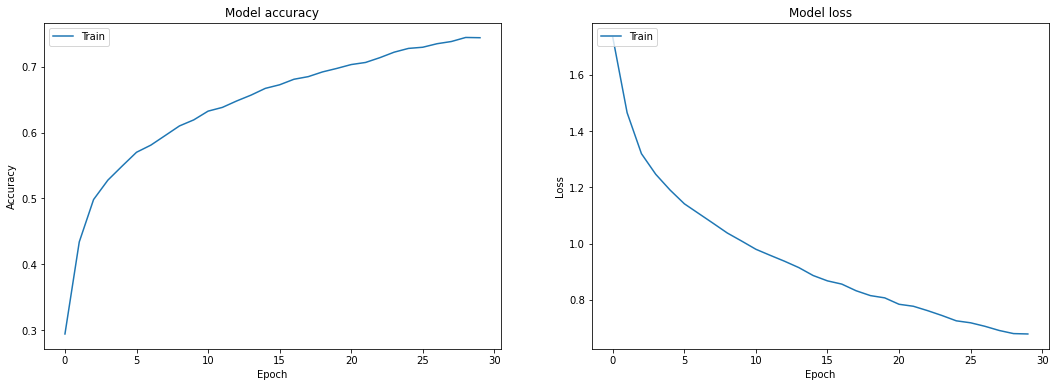

In [6]:
fig, axes = plt.subplots(1,2, figsize=(18, 6))
axes[0].plot(history.history['accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train'], loc='upper left')

axes[1].plot(history.history['loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'], loc='upper left')
plt.show()

In [7]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
model.save_weights('model.h5')